In [1]:
import pandas as pd

In [2]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [14]:
import warnings

In [15]:
warnings.filterwarnings("ignore")

In [4]:
dfjob = pd.read_csv(r"C:\Users\hp\Desktop\Dataset_2 set\Outlier Detection\jobselection.csv")

In [5]:
dfjob

,score,exam_marks,seleted
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


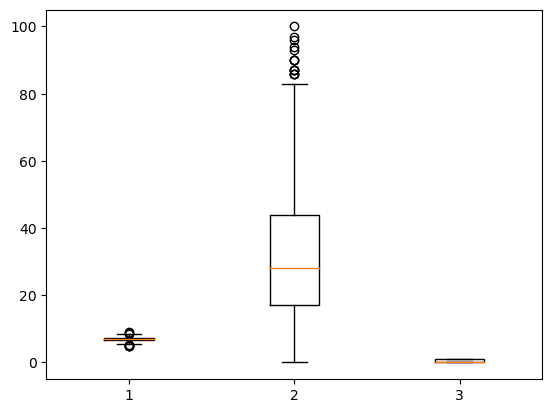

In [8]:
plt.boxplot(dfjob)
plt.show()

In [9]:
dfjob.columns

Index(['score', 'exam_marks', 'seleted'], dtype='object')

In [10]:
dfjob.columns = ['score', 'marks', 'selected']

In [11]:
dfjob

,score,marks,selected
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [12]:
dfjob["score"]

0      7.19
1      7.46
2      7.54
3      6.42
4      7.23
       ... 
995    8.87
996    9.12
997    4.89
998    8.62
999    4.90
Name: score, Length: 1000, dtype: float64

In [13]:
import seaborn as sns

<AxesSubplot:xlabel='score', ylabel='Density'>

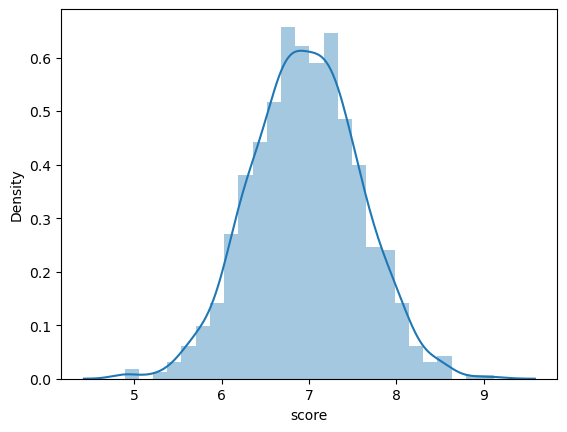

In [16]:
sns.distplot(dfjob["score"])

In [17]:
dfjob["score"].skew()

-0.014529938929314918

In [19]:
np.round(-0.014529938929314918)

-0.0

In [20]:
dfjob["score"]

0      7.19
1      7.46
2      7.54
3      6.42
4      7.23
       ... 
995    8.87
996    9.12
997    4.89
998    8.62
999    4.90
Name: score, Length: 1000, dtype: float64

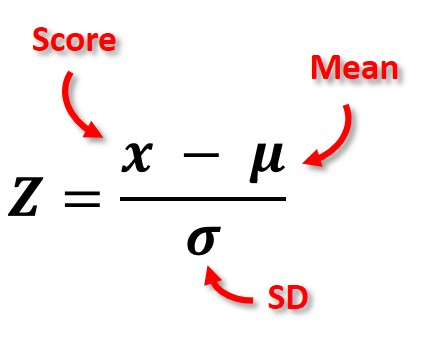

In [21]:
m = dfjob["score"].mean()

In [22]:
m

6.96124000000001

In [23]:
s = dfjob["score"].std()

In [24]:
s

0.6158978751323894

In [25]:
dfjob["score"].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: score, dtype: float64

In [26]:
m

6.96124000000001

In [27]:
dfjob["score"]

0      7.19
1      7.46
2      7.54
3      6.42
4      7.23
       ... 
995    8.87
996    9.12
997    4.89
998    8.62
999    4.90
Name: score, Length: 1000, dtype: float64

In [29]:
dfjob["zscore"] = dfjob["score"].map( lambda x : (x - m)/s )

In [30]:
dfjob

,score,marks,selected,zscore
0,7.19,26,1,0.371425
1,7.46,38,1,0.809810
2,7.54,40,1,0.939701
3,6.42,8,1,-0.878782
4,7.23,17,0,0.436371
...,...,...,...,...
995,8.87,44,1,3.099150
996,9.12,65,1,3.505062
997,4.89,34,0,-3.362960
998,8.62,46,1,2.693239


In [31]:
dfjob["zscore"] < -3

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997     True
998    False
999     True
Name: zscore, Length: 1000, dtype: bool

In [32]:
dfjob[dfjob["zscore"] < -3]

,score,marks,selected,zscore
485,4.92,44,1,-3.314251
997,4.89,34,0,-3.362960
999,4.90,10,1,-3.346724


In [33]:
dfjob["zscore"] > +3 

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996     True
997    False
998    False
999    False
Name: zscore, Length: 1000, dtype: bool

In [34]:
dfjob[ dfjob["zscore"] > +3  ]

,score,marks,selected,zscore
995,8.87,44,1,3.099150
996,9.12,65,1,3.505062


In [35]:
(dfjob["zscore"] < -3) | (dfjob["zscore"] > +3)

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996     True
997     True
998    False
999     True
Name: zscore, Length: 1000, dtype: bool

In [36]:
dfjob[ (dfjob["zscore"] < -3) | (dfjob["zscore"] > +3)]

,score,marks,selected,zscore
485,4.92,44,1,-3.314251
995,8.87,44,1,3.099150
996,9.12,65,1,3.505062
997,4.89,34,0,-3.362960
999,4.90,10,1,-3.346724


In [37]:
(dfjob["zscore"] >= -3)  &  (dfjob["zscore"] <= 3)

0       True
1       True
2       True
3       True
4       True
       ...  
995    False
996    False
997    False
998     True
999    False
Name: zscore, Length: 1000, dtype: bool

In [39]:
dfjob = dfjob[(dfjob["zscore"] >= -3)  &  (dfjob["zscore"] <= 3)]

In [40]:
dfjob

,score,marks,selected,zscore
0,7.19,26,1,0.371425
1,7.46,38,1,0.809810
2,7.54,40,1,0.939701
3,6.42,8,1,-0.878782
4,7.23,17,0,0.436371
...,...,...,...,...
991,7.04,57,0,0.127878
992,6.26,12,0,-1.138565
993,6.73,21,1,-0.375452
994,6.48,63,0,-0.781363


In [41]:
( dfjob["zscore"] < -3 ) |  (dfjob["zscore"] > 3)

0      False
1      False
2      False
3      False
4      False
       ...  
991    False
992    False
993    False
994    False
998    False
Name: zscore, Length: 995, dtype: bool

In [42]:
dfjob[ ( dfjob["zscore"] < -3 ) |  (dfjob["zscore"] > 3)]

,score,marks,selected,zscore
